<a href="https://colab.research.google.com/github/Jimin951023/AI/blob/main/4_keras_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                23050     
                                                                 
Total params: 23,466
Trainable params: 23,466
Non-trainable params: 0
_________________________________________________________________


In [4]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

In [6]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 20s 168ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 2/10
118/118 [==============================] - 16s 139ms/step - loss: 0.0118 - accuracy: 0.9964
Epoch 3/10
118/118 [==============================] - 16s 139ms/step - loss: 0.0114 - accuracy: 0.9964
Epoch 4/10
118/118 [==============================] - 16s 140ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 5/10
118/118 [==============================] - 17s 143ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 6/10
118/118 [==============================] - 17s 141ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 7/10
118/118 [==============================] - 17s 142ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 8/10
118/118 [==============================] - 17s 140ms/step - loss: 0.0074 - accuracy: 0.9977
Epoch 9/10
118/118 [==============================] - 16s 138ms/step - loss: 0.0061 - accuracy: 0.9979
Epoch 10/10
118/118 [==============================] - 17s 140ms/step - l

In [9]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.1650 - accuracy: 0.9792
0.979200005531311


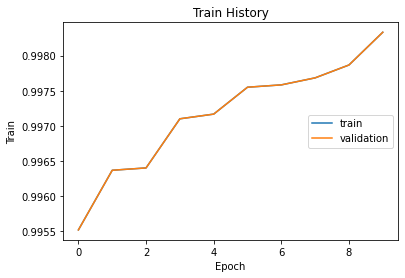

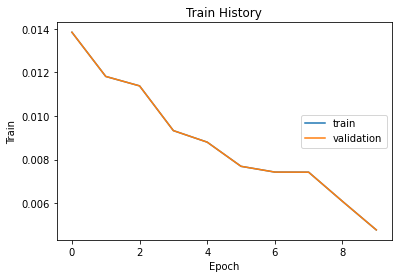

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,0,1,2,0,2,0
1,1,1121,1,2,3,0,4,1,2,0
2,3,3,1007,2,4,0,3,7,2,1
3,1,0,0,1002,0,4,0,2,1,0
4,0,0,0,0,969,1,4,1,0,7
5,2,0,0,14,0,870,2,0,0,4
6,10,0,0,1,2,3,942,0,0,0
7,0,2,9,4,2,1,0,1006,0,4
8,8,2,1,7,6,2,4,4,931,9


In [10]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])